<a href="https://colab.research.google.com/github/pratikds/machinelearning/blob/main/Comparing_ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!! Comparing Machine Learning Algorithms !! 

It is important to compare the performance of the Machien Learning Algorithms  consitently. In this code notebook , a mutliple different machien learning algorithm comparison with PYthon and Scikit-Learn to create a test Harness is Performed.


A key to a fair comparison of the machine learning Algorithms  is ensuring that each algorithms is evaluted on the same way on the same data. It is can be done using the same test harness. In this example, below mentioned classification algorithms are compared on the  single dataset.

*   Logitisc Regression
*   Linear Discriminant Analysis
*   K-Nearest Neighbour
*   Classification and  REgression Trees
*   Naive Bayes
*   Support Vector Machines

The data set used is Diabetic Patients DAtaset which has 2 classes and eight numeric input variable of varying scales. The 10-Fold Cross validation procedure is used to evaulate the each algorithm, importantly  configured with the same random seedto ensure that the same splits to the training data are perfomed and the each algorithm is evaluated in the same way.

---

Each of the above model may have different performance characteristics but using Resampling methods like cross validation , one can get the estimate for how accurate each model may be on unseen data. These estimates may be of help to chose the one or two best models. 

**When there is a new dataset, it is a good idea to visualize the data using different techniques in order to look at the data from different perspectives. The same idea applies to model selection. The Estimated accuracy metric could be a good way to choose one or two algorithms to finalize. A possible way could be to use visualization methods to show the average accuracy,  variance and other properties of the  distribution of model accuracies.**


#Comparing Different Algorithms


In [28]:
url = "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"
names = ["preg","plas","pres","skin","test" , "mass","pedi", "age", "class"]


In [29]:
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#load dataset
dataframe = pandas.read_csv(url, names = names)


In [30]:
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
array = dataframe.values
X = array[:, 0:8]
y = array[:,8]

In [25]:
X , y

(array([[148.   ,  72.   ,  35.   , ...,   0.627,  50.   ,   1.   ],
        [ 85.   ,  66.   ,  29.   , ...,   0.351,  31.   ,   0.   ],
        [183.   ,  64.   ,   0.   , ...,   0.672,  32.   ,   1.   ],
        ...,
        [121.   ,  72.   ,  23.   , ...,   0.245,  30.   ,   0.   ],
        [126.   ,  60.   ,   0.   , ...,   0.349,  47.   ,   1.   ],
        [ 93.   ,  70.   ,  31.   , ...,   0.315,  23.   ,   0.   ]]),
 array([[1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01, 6.270e-01,
         5.000e+01, 1.000e+00],
        [8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01, 3.510e-01,
         3.100e+01, 0.000e+00],
        [1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01, 6.720e-01,
         3.200e+01, 1.000e+00],
        [8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01, 1.670e-01,
         2.100e+01, 0.000e+00],
        [1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01, 2.288e+00,
         3.300e+01, 1.000e+00],
        [1.160e+02, 7.400e+01, 0.000

In [33]:
num_folds= 10
num_instances = len(X)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.768203 (0.021509)
LDA: 0.772108 (0.017342)
KNN: 0.710950 (0.017003)
CART: 0.712223 (0.032331)
NB: 0.752585 (0.016255)
SVM: 0.759078 (0.023688)


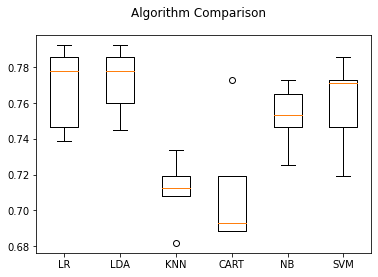

In [40]:
from sklearn import model_selection
seed= 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(( 'CART', DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(( 'SVM', SVC()))

#evaluate each model in turn

results = []
names = []
scoring = "accuracy"
for name, model in models:
  kfold = model_selection.KFold(n_splits = 5, shuffle= True, random_state=seed)
  cv_results = model_selection.cross_val_score(model , X, y,cv=kfold, scoring = scoring)
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f)" %(name ,cv_results.mean(), cv_results.std())
  print(msg)

fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels( names)
plt.show()

The results above provides a list of each algorithm  short name, the mean accuracy  andd the standard deviation accuracy.


It also provides  a  box and whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm. It is observable from the plot that Logistic regression and Linear Discriminant Analysis  are the algorithms having better worth to be selected as useful model for this dataset.
